In [1]:
library(Seurat)

Attaching SeuratObject



In [2]:
# Set notebook plot sizes
options(repr.plot.width=15, repr.plot.height=12)

# Load and prepare pbmc data following [Seurat documentation](https://satijalab.org/seurat/articles/pbmc3k_tutorial.html)

In [3]:
# Load the PBMC dataset
pbmc.data <- Read10X(data.dir = "data/datasets/pbmc3k_filtered_gene_bc_matrices/filtered_gene_bc_matrices/hg19/")
# Initialize the Seurat object with the raw (non-normalized data).
pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [4]:
# Filter, normalize and find features
pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)
pbmc <- NormalizeData(pbmc, normalization.method = "LogNormalize", scale.factor = 10000)
pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

# Scale and run PCA
pbmc <- ScaleData(pbmc, features = rownames(pbmc))
pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))

# Cluster and visualize
pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)
pbmc <- RunUMAP(pbmc, dims = 1:10)

Centering and scaling data matrix

PC_ 1 
Positive:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, S100A8, CTSS, LGALS2, SERPINA1, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
Negative:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, TRAF3IP3, GZMA, MAL, CST7, ITM2A 
	   MYC, GIMAP7, HOPX, BEX2, LDLRAP1, GZMK, ETS1, ZAP70, TNFAIP8, RIC3 
PC_ 2 
Positive:  CD79A, MS4A1, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74 
	   HLA-DMA, HLA-DPB1, HLA-DQA2, CD37, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, LTB 
	   BLNK, P2RX5, IGLL5, IRF8, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
Negative:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, CTSW, GNLY, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, S100A4, IGFBP7, ANXA1, ID2, IL32, XCL1, RHOC 
PC_ 3 
Positive:  HLA-DQA1, CD79A,

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2638
Number of edges: 95965

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8723
Number of communities: 9
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
06:44:24 UMAP embedding parameters a = 0.9922 b = 1.112

06:44:24 Read 2638 rows and found 10 numeric columns

06:44:24 Using Annoy for neighbor search, n_neighbors = 30

06:44:24 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

06:44:25 Writing NN index file to temp file /tmp/RtmpwWVz2P/file2d756c76ba30c0

06:44:25 Searching Annoy index using 1 thread, search_k = 3000

06:44:26 Annoy recall = 100%

06:44:26 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors

## Manual annotation
The Seurat documentation provides markers allowing to assign a cell type to each cluster:

| Cluster ID  | Markers  | Cell Type  |
|---|---|---|
| 0  | IL7R, CCR7  | Naive CD4+ T  |
| 1  | CD14, LYZ  | CD14+ Mono  |
| 2  | IL7R, S100A4  | Memory CD4+  |
| 3  | MS4A1  | B  |
| 4  | CD8A  | CD8+ T  |
| 5  | FCGR3A, MS4A7  | FCGR3A+ Mono  |
| 6  | GNLY, NKG7  | NK  |
| 7  | FCER1A, CST3  | DC  |
| 8  | PPBP  | Platelet  |

In [30]:
# Known markers for each cell type
c_markers = c("IL7R", "CCR7", "CD14", "LYZ", "S100A4", "MS4A1", "CD8A", "FCGR3A", "MS4A7",
              "GNLY", "NKG7", "FCER1A", "CST3", "PPBP")

In [25]:
pbmc[['manual_annotation']] = "NA"
cell_types = c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono",
    "NK", "DC", "Platelet")
for (i in 1:length(cell_types)){
    pbmc@meta.data[as.numeric(as.character(pbmc@meta.data$seurat_clusters))==i-1,'manual_annotation'] = cell_types[i]
}

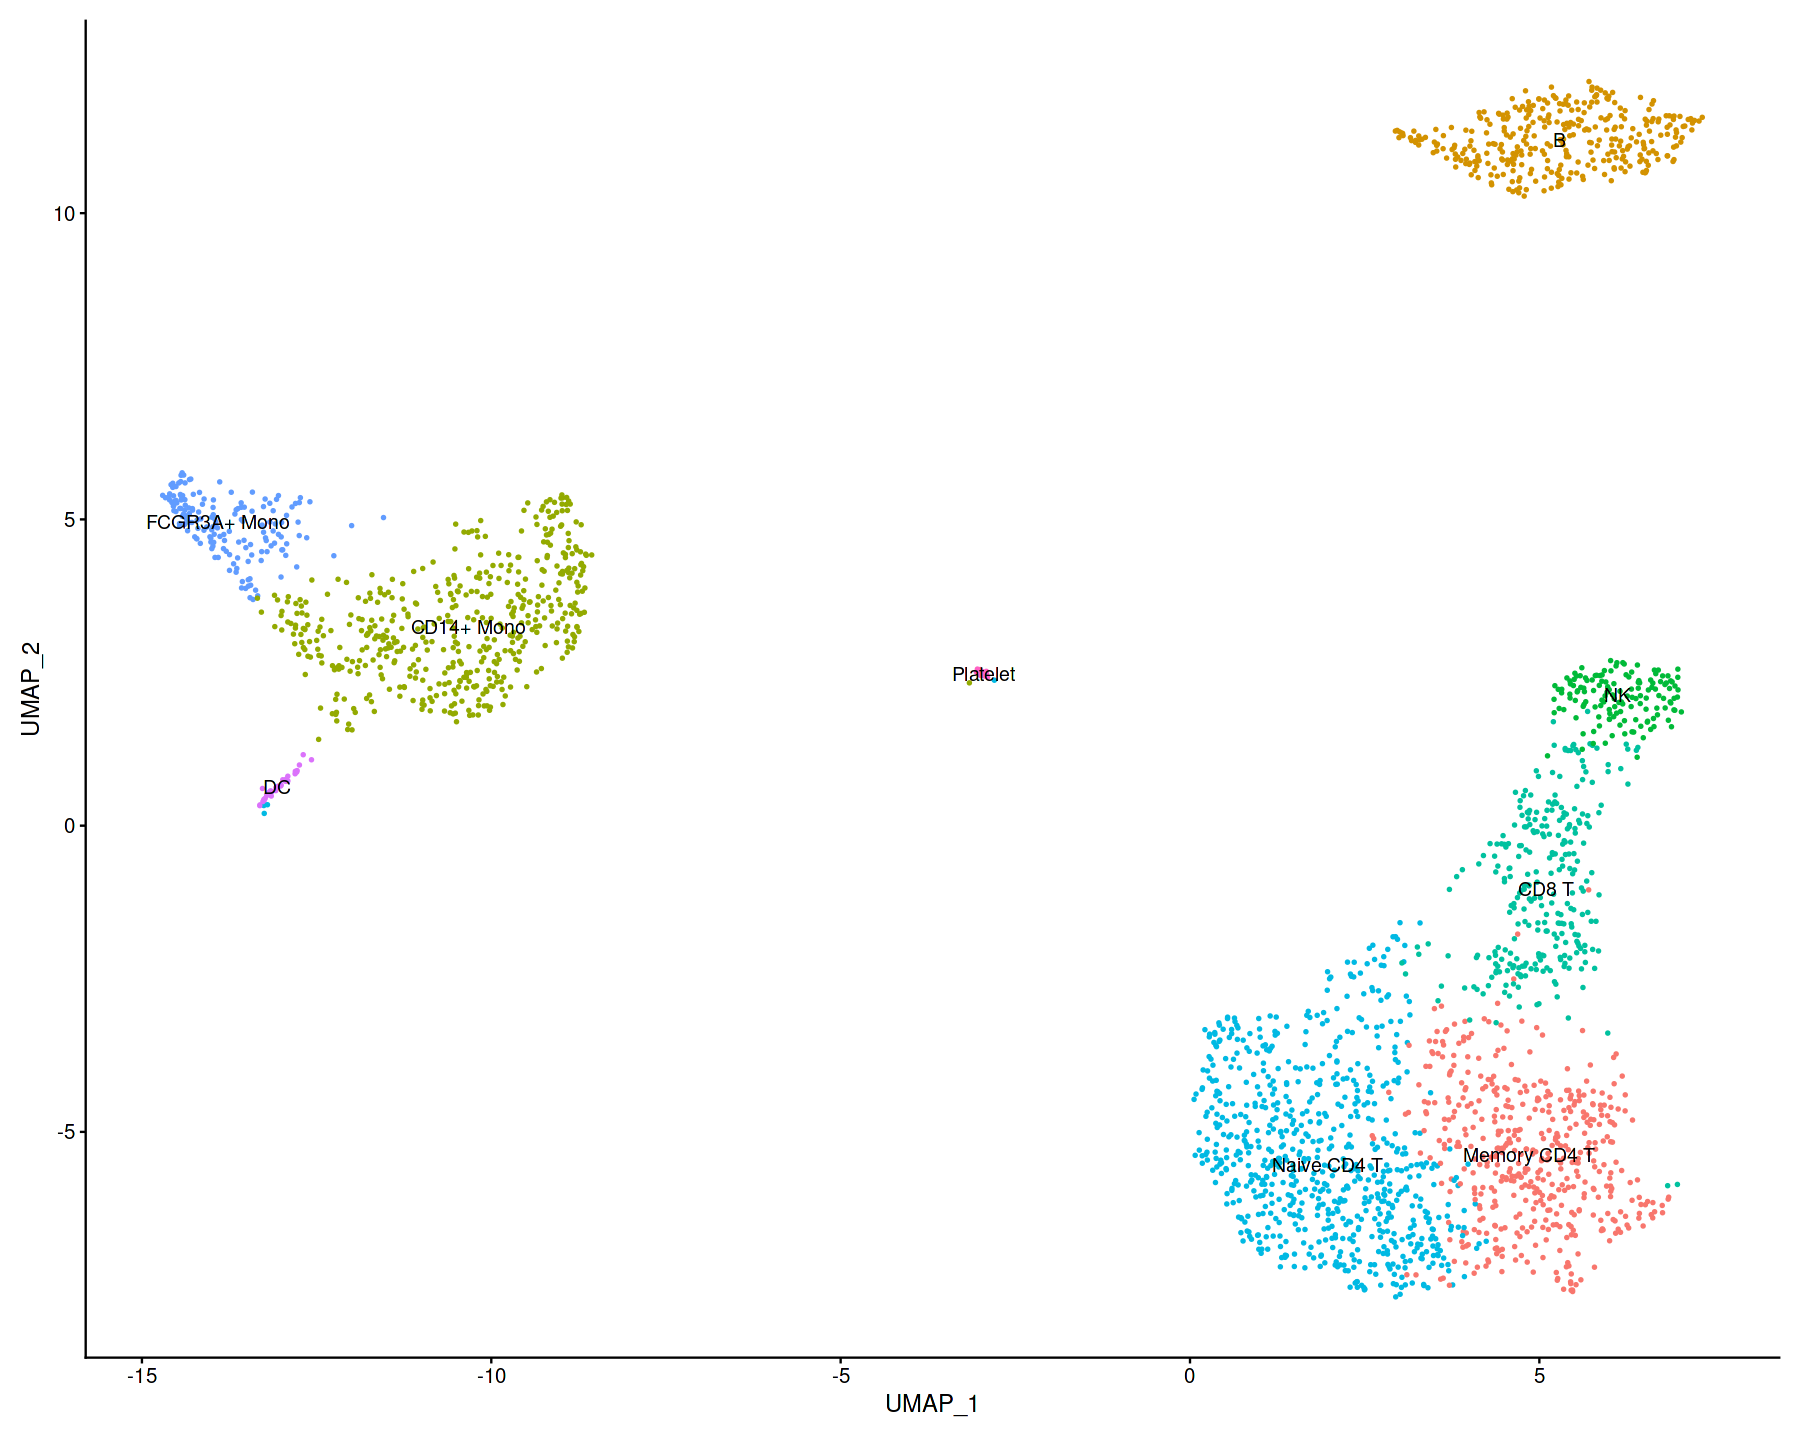

In [28]:
Idents(pbmc) = "manual_annotation"
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

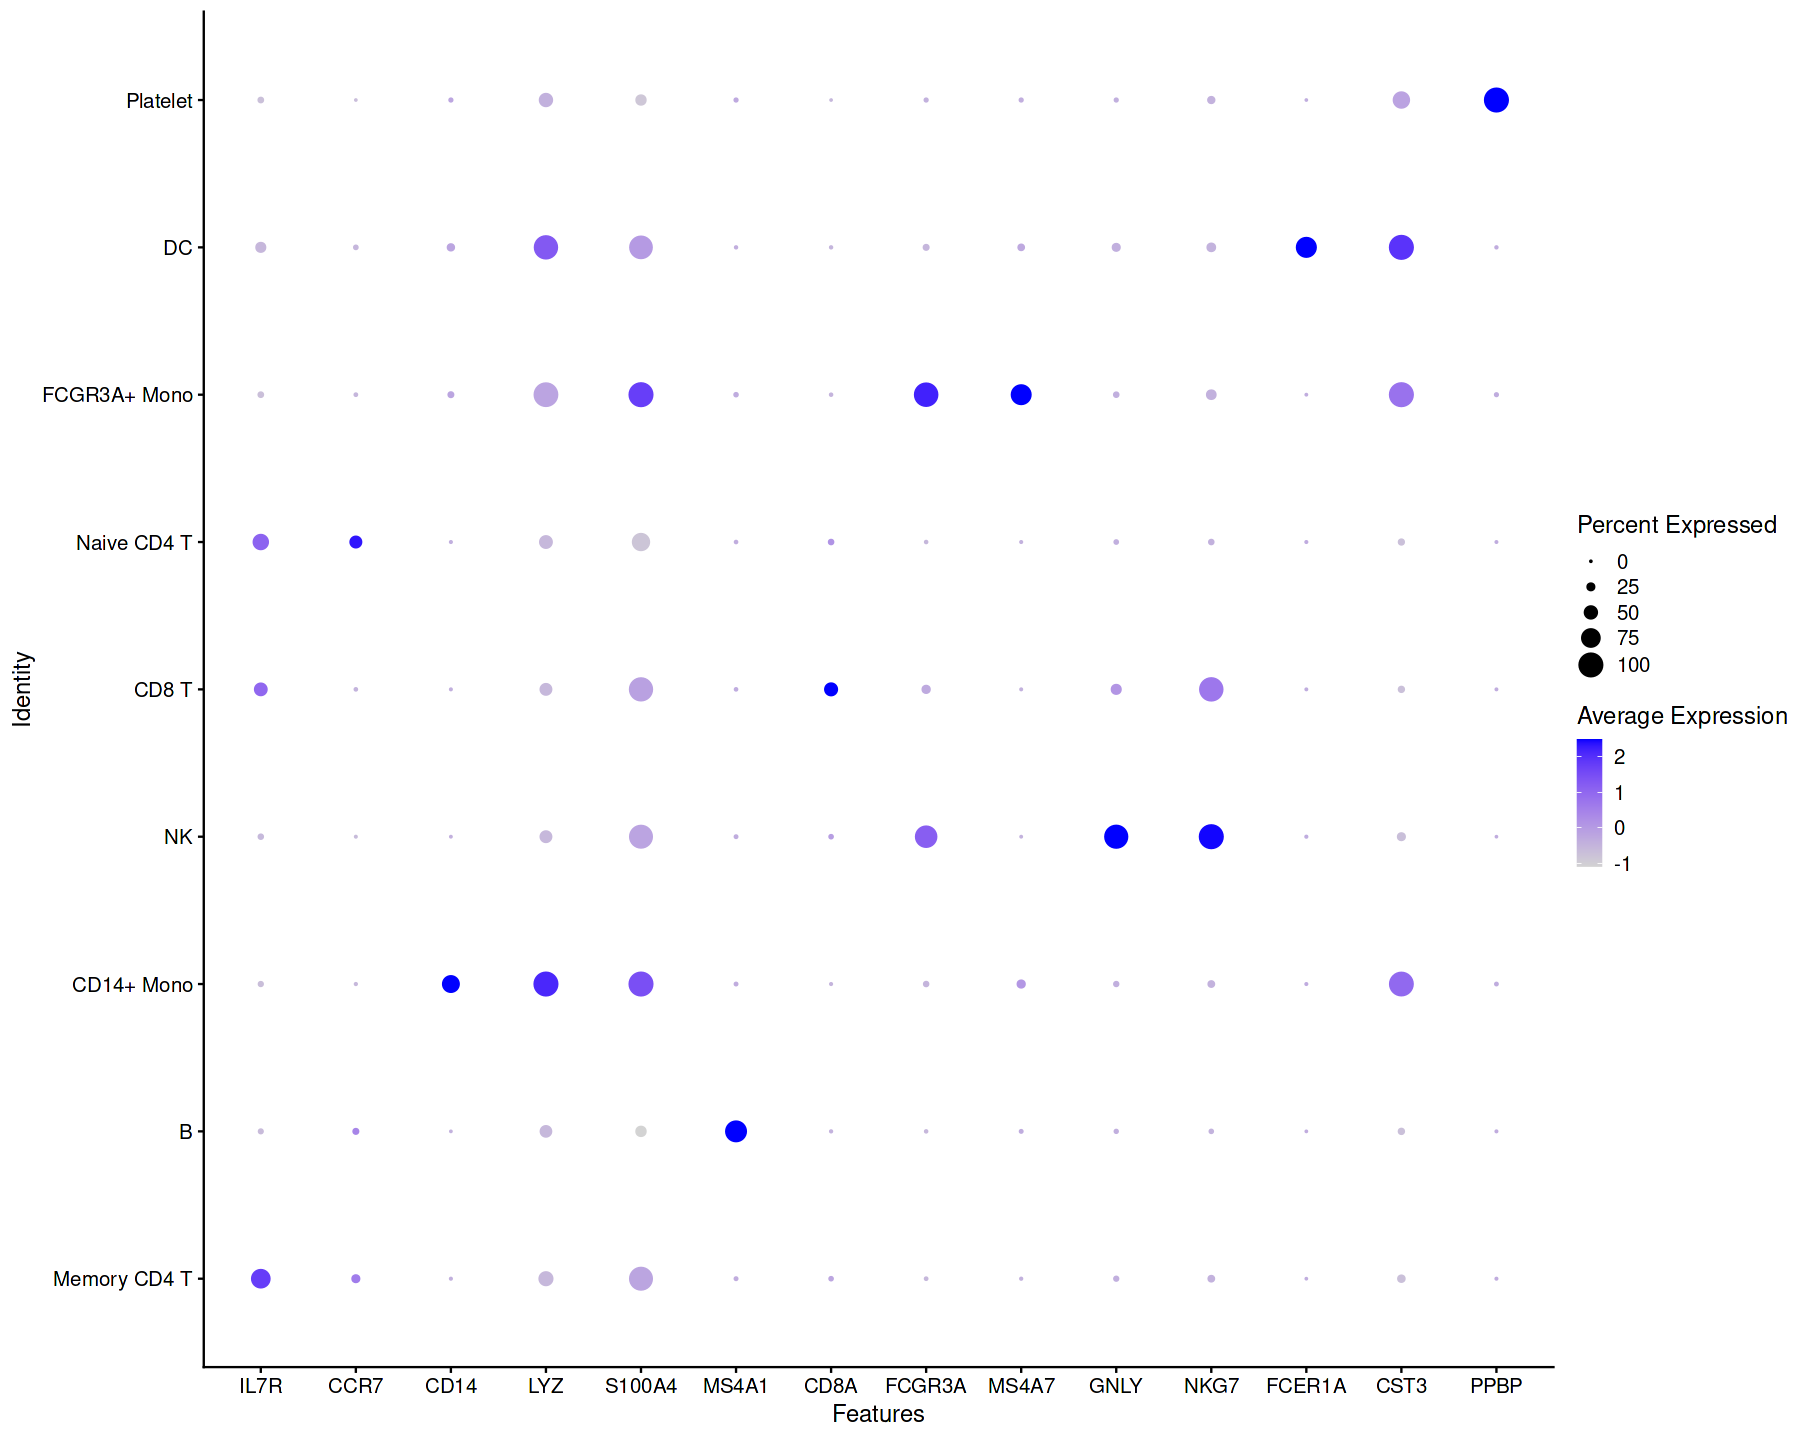

In [31]:
DotPlot(pbmc, features=c_markers)

# Export of the pbmc Seurat object. We will run adversarial attack from data of this object.

In [29]:
saveRDS(pbmc, file = "data/datasets/pbmc.rds")